# Lemmatisierer Evaluierung

In [1]:
import glob
import json
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
FILES = glob.glob("results-*.json")
data = []
algos = []
corpora = []
for FILE in FILES:
    algos.append(FILE.split('.')[0].split('results-')[1])
    with open(FILE, "r") as fp:
        results = json.load(fp)
        data += results
        print(len(results))
        if algos[-1] == 'baseline':
            corpora = [f['dataset'] for f in results]
        if len(results) != len(corpora):  # check for unlemmatized datasets
            print(set(corpora).difference(set([f['dataset'] for f in results])))

29
29
29
0
{'nosta-d-falko-orig', 'nosta-d-tuebadz-orig', 'empirist-cmc-chat-prof', 'nosta-d-unicum-orig', 'ud-pud', 'empirist-cmc-whatsapp-norm', 'tgermacorp', 'empirist-cmc-chat-prof-norm', 'empirist-cmc-twitter-norm', 'empirist-cmc-chat-social-norm', 'empirist-web-norm', 'empirist-web', 'empirist-cmc-wiki-norm', 'empirist-cmc-chat-social', 'nosta-d-kafka-norm', 'empirist-cmc-blog', 'ud-gsd', 'ud-hdt', 'nosta-d-bematac-orig', 'nosta-d-falko-norm', 'empirist-cmc-twitter', 'nosta-d-anselm-orig', 'empirist-cmc-whatsapp', 'nosta-d-bematac-norm', 'empirist-cmc-wiki', 'nosta-d-anselm-norm', 'nosta-d-kafka-orig', 'nosta-d-unicum-norm', 'empirist-cmc-blog-norm'}
29
29
29
0
{'nosta-d-falko-orig', 'nosta-d-tuebadz-orig', 'empirist-cmc-chat-prof', 'nosta-d-unicum-orig', 'ud-pud', 'empirist-cmc-whatsapp-norm', 'tgermacorp', 'empirist-cmc-chat-prof-norm', 'empirist-cmc-twitter-norm', 'empirist-cmc-chat-social-norm', 'empirist-web-norm', 'empirist-web', 'empirist-cmc-wiki-norm', 'empirist-cmc-chat

In [22]:
algos

['baseline',
 'germalemma',
 'simplemma',
 'smorlemma',
 'spacy2',
 'spacy3',
 'spacy33+',
 'stanza-pretagged',
 'stanza',
 'trankit',
 'treetagger']

In [23]:
corpora

['ud-hdt',
 'ud-gsd',
 'ud-pud',
 'nosta-d-tuebadz-orig',
 'nosta-d-anselm-orig',
 'nosta-d-anselm-norm',
 'nosta-d-kafka-orig',
 'nosta-d-kafka-norm',
 'nosta-d-bematac-orig',
 'nosta-d-bematac-norm',
 'nosta-d-unicum-orig',
 'nosta-d-unicum-norm',
 'nosta-d-falko-orig',
 'nosta-d-falko-norm',
 'empirist-cmc-twitter-norm',
 'empirist-cmc-twitter',
 'empirist-cmc-wiki-norm',
 'empirist-cmc-wiki',
 'empirist-cmc-blog-norm',
 'empirist-cmc-blog',
 'empirist-cmc-chat-prof-norm',
 'empirist-cmc-chat-prof',
 'empirist-cmc-chat-social-norm',
 'empirist-cmc-chat-social',
 'empirist-cmc-whatsapp-norm',
 'empirist-cmc-whatsapp',
 'empirist-web-norm',
 'empirist-web',
 'tgermacorp']

In [24]:
len(data)

259

In [14]:
data[0]

{'dataset': 'ud-hdt',
 'sample-size': 321919,
 'lemmatizer': 'baseline',
 'metrics': {'overall': {'number_of_lemmata': 151291,
   'accuracy': 0.5361455737618233,
   'adj_recall': 0.2843692787027426,
   'adj_precision': 0.3252421401880872,
   'adj_f1': 0.290230197168483,
   'adj_accuracy': 0.6927385931109489,
   'log-levenshtein': 0.6528508854080417,
   'log-levenshtein2': 0.7065148393473966,
   'levenshtein': 1.909360107342803,
   'levenshtein-wordlen': 0.30477192823747773,
   'true-pred-types': [16640, 37569, 0.4429183635444116]},
  'ADJ': {'number_of_lemmata': 25003,
   'accuracy': 0.3192016957965044,
   'adj_recall': 0.2510840242808265,
   'adj_precision': 0.276756899942988,
   'adj_f1': 0.25093461403012157,
   'adj_accuracy': 0.5223026537412131,
   'log-levenshtein': 0.7485857208558678,
   'log-levenshtein2': 0.7901845206863045,
   'levenshtein': 1.5273367195936487,
   'levenshtein-wordlen': 0.2579514163565506,
   'true-pred-types': [3867, 6531, 0.5920992191088654]},
  'NOUN': {'nu

In [48]:
def generate_table(df, feature, plot=True):
    table = pd.DataFrame(columns=['algorithm']+corpora)
    line = []
    algo_index = 0
    for d in data:
        if type(feature) == str:
            line.append(d[feature])
        elif type(feature) == list:
            if feature[0] and feature[1]:
                if feature[2]:
                    line.append(d[feature[0]][feature[1]][feature[2]])
                else:
                    line.append(d[feature[0]][feature[1]])
        if d['dataset'] == 'tgermacorp':  # last corpus reached, next algorithm
            # exception for stanza, 2 corpora not covered: 'empirist-web-norm', 'empirist-web'
            if d['lemmatizer'] == 'stanza':
                line.insert(-1, 0)
                line.insert(-1, 0)
            table.loc[len(table)] = [d['lemmatizer']] + line
            line = []
            algo_index += 1  # next algorithm
    table = table.set_index('algorithm')
    table = table.astype(float)
    if plot:
        sns.heatmap(table, cmap="YlGnBu")
    return table

,ud-hdt,ud-gsd,ud-pud,nosta-d-tuebadz-orig,nosta-d-anselm-orig,nosta-d-anselm-norm,nosta-d-kafka-orig,nosta-d-kafka-norm,nosta-d-bematac-orig,nosta-d-bematac-norm,...,empirist-cmc-blog,empirist-cmc-chat-prof-norm,empirist-cmc-chat-prof,empirist-cmc-chat-social-norm,empirist-cmc-chat-social,empirist-cmc-whatsapp-norm,empirist-cmc-whatsapp,empirist-web-norm,empirist-web,tgermacorp
algorithm,,,,,,,,,,,,,,,,,,,,,
baseline,0.536146,0.626204,0.589665,0.616071,0.055556,0.495528,0.606942,0.612328,0.801501,0.705787,...,0.593750,0.747549,0.625000,0.761557,0.381995,0.731579,0.615789,0.606595,0.575476,0.536667
germalemma,0.664825,0.834278,0.792086,0.792614,0.191756,0.765653,0.903012,0.912888,0.749659,0.893056,...,0.867188,0.914216,0.882353,0.642336,0.571776,0.931579,0.926316,0.845332,0.838365,0.830119
simplemma,0.761651,0.909915,0.903672,0.883523,0.202509,0.912343,0.922409,0.937341,0.766371,0.875000,...,0.906250,0.911765,0.843137,0.931873,0.681265,0.936842,0.852632,0.900139,0.882954,0.828413
spacy2,0.751975,0.875496,0.871936,0.843750,0.150538,0.910555,0.893313,0.896587,0.750341,0.793287,...,0.804688,0.904412,0.774510,0.934307,0.535280,0.915789,0.773684,0.858337,0.824431,0.783883
spacy3,0.751975,0.875496,0.871936,0.843750,0.150538,0.910555,0.893313,0.896587,0.750341,0.793287,...,0.804688,0.904412,0.774510,0.934307,0.535280,0.915789,0.773684,0.858337,0.824431,0.783883
spacy33+,0.779009,0.959490,0.941003,0.917614,0.200717,0.919499,0.935681,0.938360,0.752046,0.849074,...,0.867188,0.980392,0.904412,0.917275,0.715328,0.947368,0.894737,0.961914,0.943335,0.854421
stanza,0.784686,0.941076,0.941410,0.911526,0.161290,0.940966,0.913221,0.922567,0.732265,0.860648,...,0.843750,0.960784,0.867647,0.931873,0.547445,0.931579,0.836842,0.000000,0.000000,0.828059
trankit,0.768142,0.923088,0.927373,0.883117,0.166667,0.889088,0.883104,0.893021,0.735334,0.842130,...,0.828125,0.946078,0.835784,0.919708,0.532847,0.947368,0.821053,0.882954,0.862053,0.795313
treetagger,0.732456,0.835836,0.914454,0.870942,0.175627,0.949911,0.753446,0.764137,0.744543,0.859954,...,0.460938,0.928922,0.850490,0.905109,0.661800,0.831579,0.773684,0.658151,0.647004,0.860615


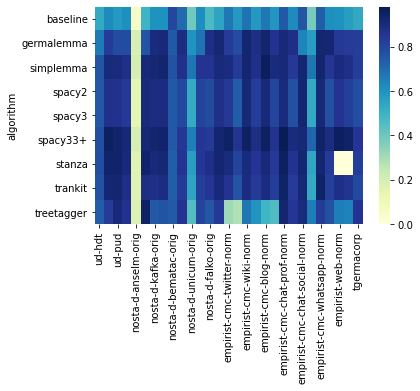

In [49]:
# accuracy
generate_table(data, ['metrics','overall','accuracy'])

,ud-hdt,ud-gsd,ud-pud,nosta-d-tuebadz-orig,nosta-d-anselm-orig,nosta-d-anselm-norm,nosta-d-kafka-orig,nosta-d-kafka-norm,nosta-d-bematac-orig,nosta-d-bematac-norm,...,empirist-cmc-blog,empirist-cmc-chat-prof-norm,empirist-cmc-chat-prof,empirist-cmc-chat-social-norm,empirist-cmc-chat-social,empirist-cmc-whatsapp-norm,empirist-cmc-whatsapp,empirist-web-norm,empirist-web,tgermacorp
algorithm,,,,,,,,,,,,,,,,,,,,,
baseline,0.000010,0.000002,0.000001,0.000001,7.152557e-07,9.536743e-07,0.000004,0.000001,0.000001,0.000001,...,7.152557e-07,4.768372e-07,7.152557e-07,7.152557e-07,7.152557e-07,9.536743e-07,7.152557e-07,7.152557e-07,9.536743e-07,0.000002
germalemma,2.142925,0.045309,0.105102,0.033496,9.042740e-03,2.724409e-03,0.013199,0.009048,0.023710,0.021410,...,1.129866e-03,5.566597e-03,3.403902e-03,2.443075e-03,2.975702e-03,1.781940e-03,1.401663e-03,2.632785e-02,1.094580e-02,0.659096
simplemma,1.359348,0.033337,0.039804,0.011167,2.717257e-03,1.054525e-03,0.007597,0.002721,0.009385,0.009757,...,4.339218e-04,1.380205e-03,8.480549e-04,1.060724e-03,8.511543e-04,7.028580e-04,5.171299e-04,9.083509e-03,2.887249e-03,0.180653
spacy2,37.655830,2.091829,2.600766,0.727722,1.263287e-01,2.541361e-01,0.603422,0.607417,1.540947,2.532684,...,2.614498e-02,2.252433e-01,2.236454e-01,4.468524e-01,4.505794e-01,1.046658e-01,1.052594e-01,4.710474e-01,4.671352e-01,22.138546
spacy3,3.065247,0.154291,0.206674,0.053512,1.265883e-02,1.014876e-02,0.034647,0.029730,0.055788,0.079646,...,2.794266e-03,1.212478e-02,9.011745e-03,1.275539e-02,1.151252e-02,5.882502e-03,4.963398e-03,4.319429e-02,2.864623e-02,1.467191
spacy33+,477.187818,24.355315,28.735961,8.497742,1.621092e+00,2.899279e+00,6.851646,6.867602,18.365620,29.813474,...,3.166358e-01,2.616139e+00,2.639331e+00,5.392761e+00,5.436773e+00,1.331755e+00,1.331373e+00,5.626328e+00,5.575744e+00,247.855176
stanza,198.180946,7.693868,10.259934,4.090499,1.441758e+00,6.689305e-01,2.871983,2.669981,9.728632,7.426282,...,3.246326e-01,6.828961e-01,6.797912e-01,1.022450e+00,1.071663e+00,6.285167e-01,6.217363e-01,0.000000e+00,0.000000e+00,72.668480
trankit,92.075847,5.126267,5.251806,1.631051,5.357308e-01,4.343665e-01,1.486821,1.241671,1.673151,2.563111,...,3.043888e-01,5.203922e-01,5.858243e-01,9.413936e-01,9.609404e-01,8.242714e-01,7.694921e-01,1.474404e+00,1.565699e+00,34.579236
treetagger,29.664026,1.436998,1.829095,0.498042,8.549881e-02,1.623814e-01,0.430194,0.430972,1.022477,1.674016,...,2.049303e-02,1.460686e-01,1.459277e-01,2.915311e-01,2.881613e-01,6.984043e-02,6.990361e-02,3.549004e-01,3.515089e-01,15.010635


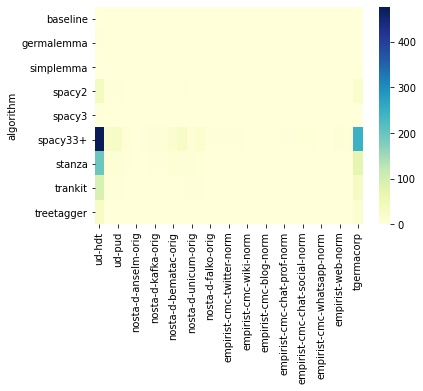

In [50]:
generate_table(data, 'elapsed')

,ud-hdt,ud-gsd,ud-pud,nosta-d-tuebadz-orig,nosta-d-anselm-orig,nosta-d-anselm-norm,nosta-d-kafka-orig,nosta-d-kafka-norm,nosta-d-bematac-orig,nosta-d-bematac-norm,...,empirist-cmc-blog,empirist-cmc-chat-prof-norm,empirist-cmc-chat-prof,empirist-cmc-chat-social-norm,empirist-cmc-chat-social,empirist-cmc-whatsapp-norm,empirist-cmc-whatsapp,empirist-web-norm,empirist-web,tgermacorp
algorithm,,,,,,,,,,,,,,,,,,,,,
baseline,496.0,0.0,0.0,0.0,0.0,48.0,72.0,48.0,0.0,48.0,...,48.0,0.0,48.0,0.0,48.0,0.0,48.0,0.0,48.0,0.0
germalemma,29337051.0,445654.0,1072819.0,365690.0,18424434.0,34323.0,164403.0,129141.0,242520.0,312534.0,...,12293.0,57088.0,38184.0,24029.0,28308.0,21412.0,17376.0,290233.0,130179.0,7046389.0
simplemma,172822411.0,600686.0,3409533.0,186298.0,73801.0,22706.0,90122.0,62834.0,161200.0,215558.0,...,8886.0,30923.0,20271.0,32077.0,27384.0,16210.0,12554.0,149956.0,58431.0,3919518.0
spacy2,352423057.0,13160833.0,17285583.0,4514970.0,1336909.0,1340931.0,4119725.0,4121543.0,10448716.0,12864585.0,...,742342.0,1193656.0,1193456.0,1904625.0,1910453.0,627553.0,630258.0,4272894.0,4250923.0,139359333.0
spacy3,158755532.0,9213360.0,8307398.0,2258203.0,434195.0,773655.0,1891728.0,1869260.0,5350730.0,8438941.0,...,97896.0,712753.0,700716.0,1502206.0,1498460.0,328364.0,321728.0,1746617.0,1646353.0,70722350.0
spacy33+,250276636.0,14259940.0,14609483.0,4130722.0,2593586.0,1728737.0,3696662.0,3675722.0,30121147.0,20754081.0,...,1684801.0,1551599.0,1540080.0,2702881.0,2708236.0,996173.0,992503.0,7603307.0,7504281.0,134541136.0
stanza,497860591.0,24891181.0,32442834.0,15108791.0,4832711.0,6028854.0,18543354.0,18563794.0,129133324.0,75883598.0,...,870652.0,3743139.0,3743222.0,4406510.0,4402801.0,1702056.0,1702866.0,0.0,0.0,278396198.0
trankit,375388621.0,19852042.0,26524169.0,8414314.0,2119619.0,2256954.0,7968403.0,8186370.0,11384648.0,15491662.0,...,590794.0,1727339.0,1723982.0,1941991.0,1943882.0,941707.0,942355.0,7768762.0,7769900.0,181069333.0
treetagger,20562665.0,952248.0,1342882.0,322648.0,90312.0,90613.0,300974.0,307653.0,595972.0,718110.0,...,56903.0,74666.0,72399.0,83301.0,84038.0,42872.0,43491.0,329808.0,330419.0,9641887.0


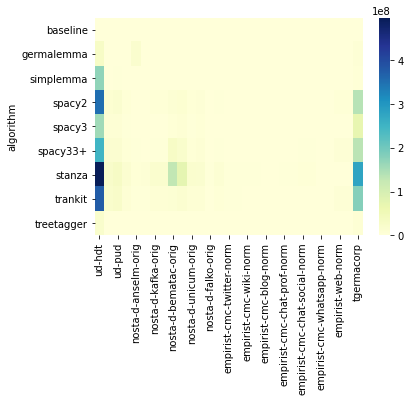

In [51]:
generate_table(data, 'memory_peak')

,ud-hdt,ud-gsd,ud-pud,nosta-d-tuebadz-orig,nosta-d-anselm-orig,nosta-d-anselm-norm,nosta-d-kafka-orig,nosta-d-kafka-norm,nosta-d-bematac-orig,nosta-d-bematac-norm,...,empirist-cmc-blog,empirist-cmc-chat-prof-norm,empirist-cmc-chat-prof,empirist-cmc-chat-social-norm,empirist-cmc-chat-social,empirist-cmc-whatsapp-norm,empirist-cmc-whatsapp,empirist-web-norm,empirist-web,tgermacorp
algorithm,,,,,,,,,,,,,,,,,,,,,
baseline,0.652851,0.386689,0.424980,0.394427,1.189942,0.541459,0.432488,0.421565,0.238445,0.277915,...,0.468723,0.266870,0.382270,0.255120,0.585287,0.295792,0.390584,0.392006,0.421869,0.490010
germalemma,0.616231,0.286938,0.325927,0.324637,0.981845,0.372595,0.114477,0.102477,0.288272,0.113819,...,0.182800,0.148312,0.188442,0.606028,0.673620,0.107415,0.115331,0.217988,0.227166,0.210199
simplemma,0.417395,0.097093,0.097799,0.121313,1.048376,0.109832,0.083454,0.063280,0.282355,0.122408,...,0.107173,0.084403,0.164185,0.064751,0.319117,0.074674,0.153360,0.098019,0.115515,0.184605
spacy2,0.420470,0.120734,0.119896,0.148822,1.073711,0.083504,0.109730,0.105136,0.295811,0.191175,...,0.252097,0.092323,0.222208,0.063795,0.412011,0.102154,0.221589,0.129116,0.161427,0.223129
spacy3,0.420470,0.120734,0.119896,0.148822,1.073711,0.083504,0.109730,0.105136,0.295811,0.191175,...,0.252097,0.092323,0.222208,0.063795,0.412011,0.102154,0.221589,0.129116,0.161427,0.223129
spacy33+,0.394478,0.044065,0.058771,0.079305,1.021290,0.086079,0.063722,0.061640,0.286104,0.148972,...,0.193857,0.020517,0.098600,0.077611,0.280818,0.061124,0.113653,0.036289,0.054483,0.152525
stanza,0.394289,0.063525,0.059862,0.090308,1.043196,0.064345,0.087747,0.075729,0.319276,0.148454,...,0.194977,0.043022,0.133922,0.069565,0.422034,0.079282,0.164089,0.000000,0.000000,0.186198
trankit,0.411514,0.084633,0.076543,0.121678,1.021753,0.115936,0.121865,0.109643,0.306281,0.158116,...,0.240443,0.061840,0.173068,0.077741,0.435812,0.071986,0.201299,0.117046,0.139406,0.224402
treetagger,0.497674,0.309776,0.124808,0.200927,1.068016,0.081020,0.427108,0.410280,0.322751,0.152596,...,0.984775,0.109690,0.228098,0.118962,0.353355,0.302992,0.347390,0.633617,0.646297,0.165648


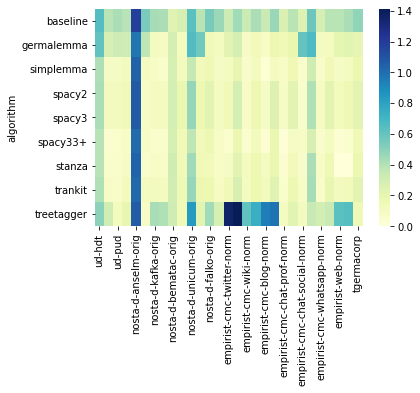

In [52]:
generate_table(data, ['metrics','overall','log-levenshtein'])

,ud-hdt,ud-gsd,ud-pud,nosta-d-tuebadz-orig,nosta-d-anselm-orig,nosta-d-anselm-norm,nosta-d-kafka-orig,nosta-d-kafka-norm,nosta-d-bematac-orig,nosta-d-bematac-norm,...,empirist-cmc-blog,empirist-cmc-chat-prof-norm,empirist-cmc-chat-prof,empirist-cmc-chat-social-norm,empirist-cmc-chat-social,empirist-cmc-whatsapp-norm,empirist-cmc-whatsapp,empirist-web-norm,empirist-web,tgermacorp
algorithm,,,,,,,,,,,,,,,,,,,,,
baseline,0.706515,0.431465,0.467456,0.445910,1.500608,0.635414,0.484863,0.470011,0.286838,0.372964,...,0.545743,0.293112,0.454111,0.306427,0.778042,0.338190,0.482423,0.433826,0.476508,0.549039
germalemma,0.636900,0.291662,0.336340,0.338557,1.173697,0.380762,0.121021,0.106175,0.360366,0.138630,...,0.199449,0.149853,0.193128,0.616533,0.694470,0.111278,0.120708,0.230234,0.238839,0.221844
simplemma,0.448270,0.115795,0.114000,0.144260,1.327265,0.131341,0.100375,0.075055,0.342449,0.157470,...,0.126930,0.096812,0.193892,0.078610,0.418001,0.084402,0.190998,0.119056,0.140268,0.210681
spacy2,0.448845,0.139006,0.133494,0.172312,1.365469,0.096957,0.130678,0.124631,0.357899,0.253631,...,0.305909,0.096873,0.268026,0.073726,0.568145,0.111908,0.281190,0.144819,0.188635,0.253526
spacy3,0.448845,0.139006,0.133494,0.172312,1.365469,0.096957,0.130678,0.124631,0.357899,0.253631,...,0.305909,0.096873,0.268026,0.073726,0.568145,0.111908,0.281190,0.144819,0.188635,0.253526
spacy33+,0.417353,0.053687,0.066154,0.095195,1.293914,0.106006,0.077540,0.073842,0.348465,0.190910,...,0.237342,0.024204,0.118421,0.103416,0.365923,0.075807,0.138876,0.043786,0.065831,0.177853
stanza,0.416149,0.071576,0.065474,0.102554,1.334804,0.072460,0.104041,0.089259,0.388181,0.182762,...,0.230777,0.045426,0.162009,0.084033,0.576495,0.089887,0.210287,0.000000,0.000000,0.208317
trankit,0.436296,0.096294,0.084436,0.140727,1.316717,0.133766,0.143781,0.128562,0.371694,0.196975,...,0.288043,0.066621,0.207705,0.095879,0.587829,0.076212,0.249672,0.131970,0.159021,0.253101
treetagger,0.536956,0.348583,0.139540,0.229135,1.348270,0.092214,0.480896,0.461224,0.385601,0.191717,...,1.133199,0.126304,0.261309,0.141116,0.461346,0.339389,0.404764,0.718869,0.732980,0.183582


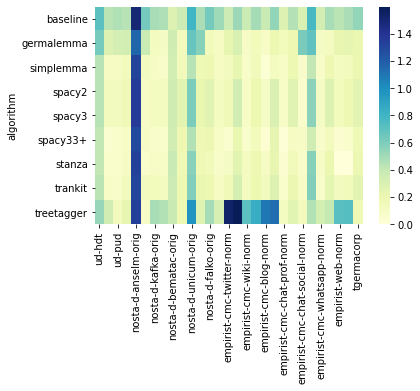

In [53]:
generate_table(data, ['metrics','overall','log-levenshtein2'])

,ud-hdt,ud-gsd,ud-pud,nosta-d-tuebadz-orig,nosta-d-anselm-orig,nosta-d-anselm-norm,nosta-d-kafka-orig,nosta-d-kafka-norm,nosta-d-bematac-orig,nosta-d-bematac-norm,...,empirist-cmc-blog,empirist-cmc-chat-prof-norm,empirist-cmc-chat-prof,empirist-cmc-chat-social-norm,empirist-cmc-chat-social,empirist-cmc-whatsapp-norm,empirist-cmc-whatsapp,empirist-web-norm,empirist-web,tgermacorp
algorithm,,,,,,,,,,,,,,,,,,,,,
baseline,1.909360,0.737819,0.803174,0.739042,2.569892,1.039356,0.854518,0.824758,0.548431,0.496528,...,1.054688,0.507353,0.742647,0.491484,1.087591,0.594737,0.752632,0.719926,0.775662,0.966180
germalemma,2.110344,0.883569,0.944665,0.943994,2.172043,1.003578,0.248596,0.224147,0.621419,0.222685,...,0.492188,0.465686,0.568627,1.727494,1.849148,0.342105,0.357895,0.619136,0.638179,0.523192
simplemma,1.431110,0.198159,0.183603,0.226867,2.306452,0.236136,0.162838,0.117677,0.638472,0.221991,...,0.250000,0.149510,0.328431,0.121655,0.625304,0.157895,0.300000,0.180678,0.212726,0.373862
spacy2,1.459856,0.235127,0.219510,0.264610,2.327957,0.146691,0.211332,0.200204,0.659618,0.338657,...,0.656250,0.164216,0.431373,0.119221,0.742092,0.215789,0.415789,0.223874,0.283326,0.439384
spacy3,1.459856,0.235127,0.219510,0.264610,2.327957,0.146691,0.211332,0.200204,0.659618,0.338657,...,0.656250,0.164216,0.431373,0.119221,0.742092,0.215789,0.415789,0.223874,0.283326,0.439384
spacy33+,1.373486,0.095751,0.109043,0.140016,2.252688,0.166369,0.118938,0.116149,0.632333,0.271296,...,0.554688,0.039216,0.210784,0.136253,0.540146,0.126316,0.226316,0.064561,0.097538,0.308560
stanza,1.403230,0.137535,0.126742,0.176542,2.249104,0.134168,0.174579,0.149261,0.719645,0.294444,...,0.492188,0.090686,0.281863,0.133820,0.795620,0.194737,0.342105,0.000000,0.000000,0.399444
trankit,1.439649,0.182011,0.161632,0.239448,2.182796,0.225403,0.242981,0.217524,0.677012,0.295602,...,0.656250,0.129902,0.362745,0.143552,0.807786,0.189474,0.447368,0.235950,0.281003,0.476602
treetagger,1.748015,1.077195,0.361611,0.631088,2.369176,0.232558,1.346095,1.297504,0.775580,0.321296,...,3.210938,0.313725,0.678922,0.304136,0.746959,0.957895,1.026316,2.163028,2.191361,0.386292


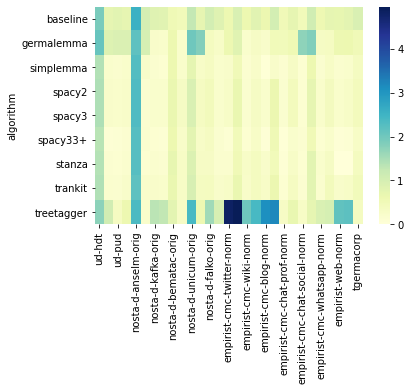

In [54]:
generate_table(data, ['metrics','overall','levenshtein'])

,ud-hdt,ud-gsd,ud-pud,germanc,archimob,nosta-d
algorithm,,,,,,
baseline,0.304754,0.115507,0.122740,0.119633,0.0,0.121739
germalemma,0.337802,0.143275,0.154404,0.091475,0.0,0.097577
simplemma,0.227112,0.027318,0.024778,0.048959,0.0,0.034267
spacy2,0.234648,0.036500,0.035404,0.046863,0.0,0.049689
spacy3,0.234648,0.036500,0.035404,0.046862,0.0,0.049689
spacy33+,0.220426,0.015153,0.018586,0.042070,0.0,0.038821
stanza,0.224465,0.020478,0.018821,0.051890,0.0,0.040830
trankit,0.230836,0.026771,0.023693,0.056563,0.0,0.048107


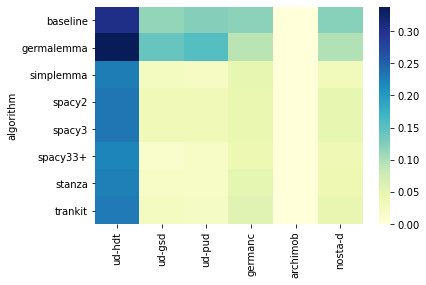

In [13]:
generate_table(data, ['metrics','overall','levenshtein-wordlen'])

In [14]:
# highest levenshtein diffs on ud-hdt, interesting!
# no huge difference between different levenshtein measures
# (for algos and corpora, but maybe diff with POS?)

In [78]:
# pos tag comparison based on accuracy
pos = pd.DataFrame(dtype='float')
dataset = "nosta-d-tuebadz-orig"

for item in data:
    lem = item["lemmatizer"]
    if (item['dataset'] == dataset) and (item["lemmatizer"] in algos) and \
    (item["lemmatizer"] not in pos.columns) and ('metrics' in item):
        tmp = pd.DataFrame.from_dict(item['metrics']).T
        tmp[lem] = tmp['accuracy']
        pos = pd.merge(pos, tmp[lem], left_index=True, right_index=True, how='right')

# UPOS and XPOS tags
upos, xpos = pos.iloc[1:6,:], pos.iloc[6:,:]

In [79]:
upos

,baseline,germalemma,simplemma,spacy2,spacy3,spacy33+,stanza,trankit,treetagger
NOUN,0.72311,0.908413,0.907348,0.853035,0.853035,0.900958,0.895634,0.877529,0.884984
PROPN,0.948052,0.0,0.954545,0.957792,0.957792,0.980519,0.941558,0.935065,0.883117
VERB,0.296524,0.916155,0.770961,0.852761,0.852761,0.91002,0.889571,0.848671,0.848671
ADV,0.854237,0.969492,0.976271,0.833898,0.833898,0.969492,0.969492,0.959322,0.898305
ADJ,0.313131,0.838384,0.835859,0.729798,0.729798,0.876263,0.906566,0.835859,0.828283


In [80]:
xpos

,baseline,germalemma,simplemma,spacy2,spacy3,spacy33+,stanza,trankit,treetagger
ADJD,0.808696,0.930435,0.930435,0.808696,0.808696,0.93913,0.93913,0.895652,0.834783
NN,0.72311,0.908413,0.907348,0.853035,0.853035,0.900958,0.895634,0.877529,0.884984
NE,0.948052,0.0,0.954545,0.957792,0.957792,0.980519,0.941558,0.935065,0.883117
ADJA,0.11032,0.800712,0.797153,0.697509,0.697509,0.850534,0.893238,0.811388,0.825623
PAV,0.714286,0.892857,0.928571,0.785714,0.785714,0.928571,0.928571,0.928571,0.928571
VMINF,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
VVFIN,0.188525,0.893443,0.795082,0.827869,0.827869,0.868852,0.856557,0.811475,0.819672
VVIZU,0.0,0.714286,1.0,1.0,1.0,1.0,1.0,0.857143,1.0
VMPP,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
PWAV,0.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [82]:
from matplotlib.pyplot import figure

def pos_figure(pos=pos):
    figure(figsize=(10, 10), dpi=144)
    plt.imshow(pos.to_numpy(dtype='float'))
    #plt.imshow(df.fillna(0).values)
    plt.xticks(range(len(pos.columns)), list(pos.columns), rotation=90)
    plt.yticks(range(len(pos.index)), pos.index, rotation=0)
    plt.colorbar();
    plt.show();

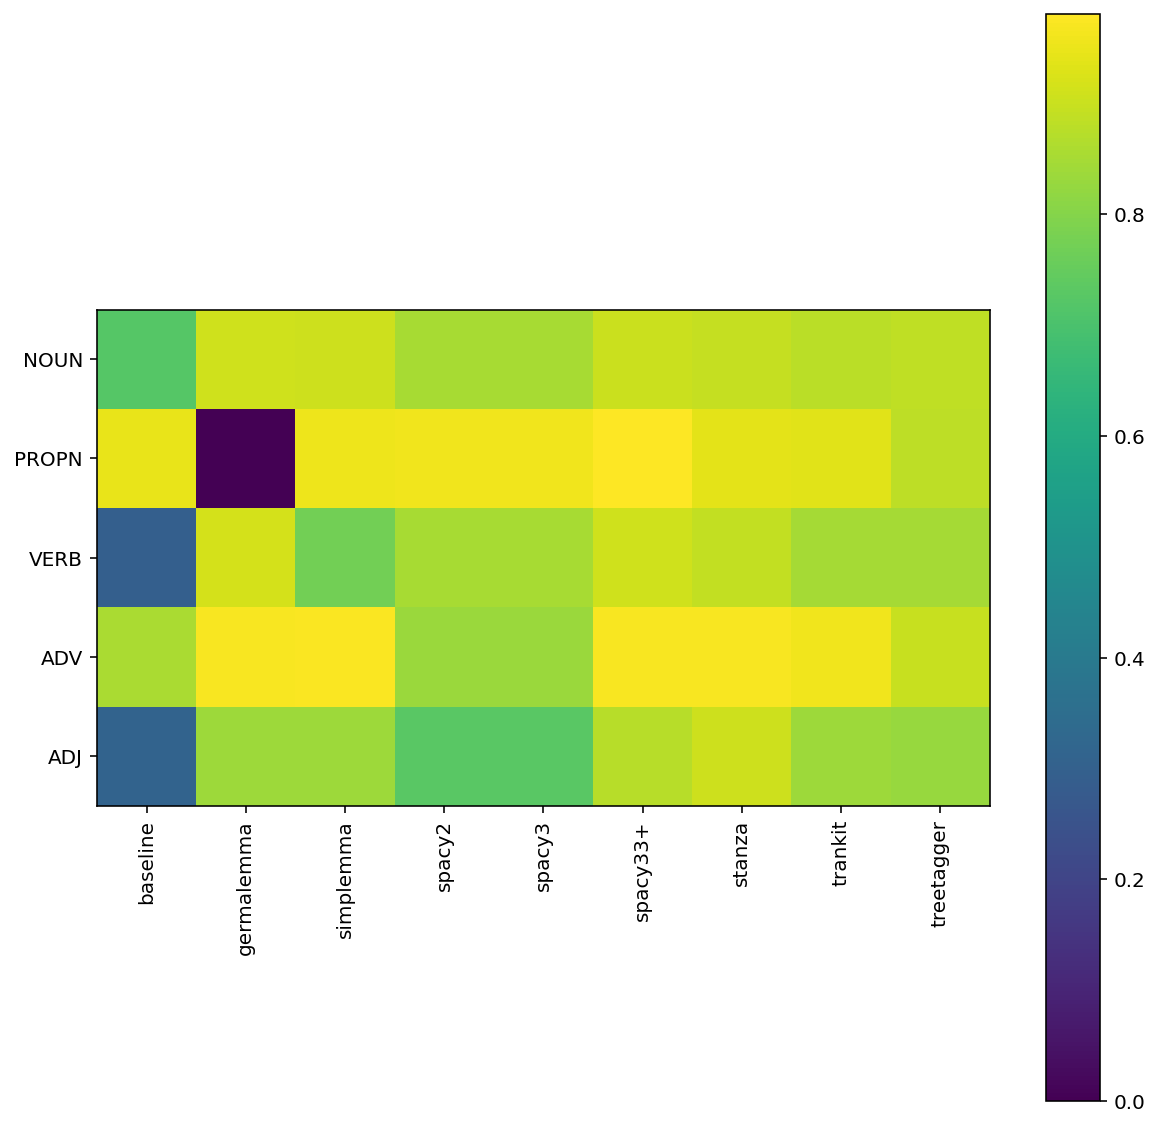

In [83]:
pos_figure(upos)

Observations:
* baseline (unsurprisingly) performs best with least inflected word categories: adverbs and proper nouns
* germalemma performs worst on proper nouns
* simplemma (unlike other algos) performs better with adjectives, worse with verbs
* spacys(2,3,3.3): improved for almost all categories, but not proper nouns, interesting! 
* similar pattern for stanza & trankit: very good on all categories, worst on nouns and adjectives